
--- KNN ---
Confusion Matrix:
[[3 7]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.30      0.46        10
           1       0.46      1.00      0.63         6

    accuracy                           0.56        16
   macro avg       0.73      0.65      0.55        16
weighted avg       0.80      0.56      0.53        16





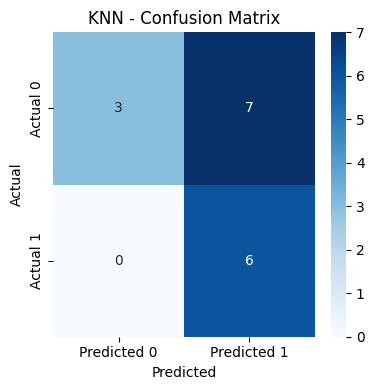

Accuracy: 0.56

--- Decision Tree ---
Confusion Matrix:
[[6 4]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.60      0.75        10
           1       0.60      1.00      0.75         6

    accuracy                           0.75        16
   macro avg       0.80      0.80      0.75        16
weighted avg       0.85      0.75      0.75        16





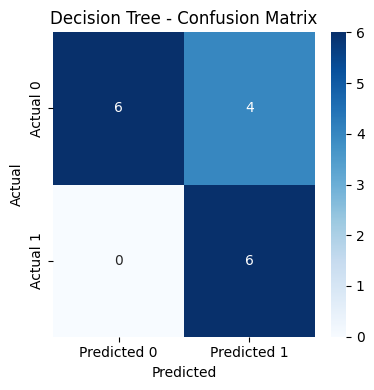

Accuracy: 0.75

--- Random Forest ---
Confusion Matrix:
[[5 5]
 [0 6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.55      1.00      0.71         6

    accuracy                           0.69        16
   macro avg       0.77      0.75      0.69        16
weighted avg       0.83      0.69      0.68        16





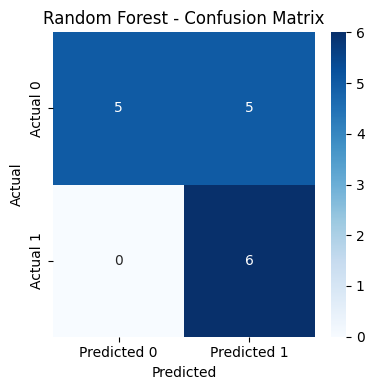

Accuracy: 0.69


In [7]:
# Required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load e-commerce dataset
df_ecom = pd.read_csv("Ecommerce_Consumer_Behavior_Analysis_Data.csv")
df_ecom["Time_of_Purchase"] = pd.to_datetime(df_ecom["Time_of_Purchase"])

# Select numerical columns and compute weekly averages
numeric_cols = df_ecom.select_dtypes(include="number").columns
df_weekly = df_ecom.groupby(pd.Grouper(key="Time_of_Purchase", freq="W"))[numeric_cols].mean().reset_index()

# Load Google Trends data (Clothing: Worldwide)
df_trend = pd.read_csv("multiTimeline-1.csv", skiprows=1)
df_trend.rename(columns={df_trend.columns[0]: "date"}, inplace=True)
df_trend["date"] = pd.to_datetime(df_trend["date"])

# Get the category name (column name for Google Trends data)
category_name = df_trend.columns[1]  # "Clothing: (Worldwide)"

# Merge the two datasets
df_merged = pd.merge(df_weekly, df_trend[["date", category_name]],
                     left_on="Time_of_Purchase", right_on="date", how="inner")

# Convert Customer_Satisfaction into a binary variable
# If above average → 1 (high), else → 0 (low)
mean_satisfaction = df_merged["Customer_Satisfaction"].mean()
df_merged["Satisfaction_Level"] = (df_merged["Customer_Satisfaction"] > mean_satisfaction).astype(int)

# Define features (X) and target (y)
X = df_merged[[category_name]].values
y = df_merged["Satisfaction_Level"].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define the models to use
models = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Train, test, and print evaluation metrics for each model
for name, model in models.items():
    print(f"\n--- {name} ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")
    plot_conf_matrix(cm, name)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(cm, model_name):
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()
